# Digit Recognizer Project

This project focuses on building a model to recognize handwritten digits using a variety of machine learning techniques. We will explore different models such as Artificial Neural Network (ANN) and a Convolutional Neural Network (CNN).


In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


# Import necessary libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, BatchNormalization, MaxPool2D
import keras_tuner as kt
import keras

Get the data into pandas dataframe.

In [7]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train.shape

(42000, 785)

# Data Exploration and Preprocessing

In [8]:
train.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


Seperating X(data) and Y(label)

In [10]:
X = train.iloc[:,1:].values
y = train['label']

In [11]:
# Converting train dataset into 28x28
train_images = train.drop(columns='label').values

X_28x28 = train_images.reshape(-1, 28, 28).astype(np.uint8)

In [12]:
print('X:',X.shape)
print('y:',y.shape)
print('X_28x28:',X_28x28.shape)

X: (42000, 784)
y: (42000,)
X_28x28: (42000, 28, 28)


Defining function to plot random images from dataset

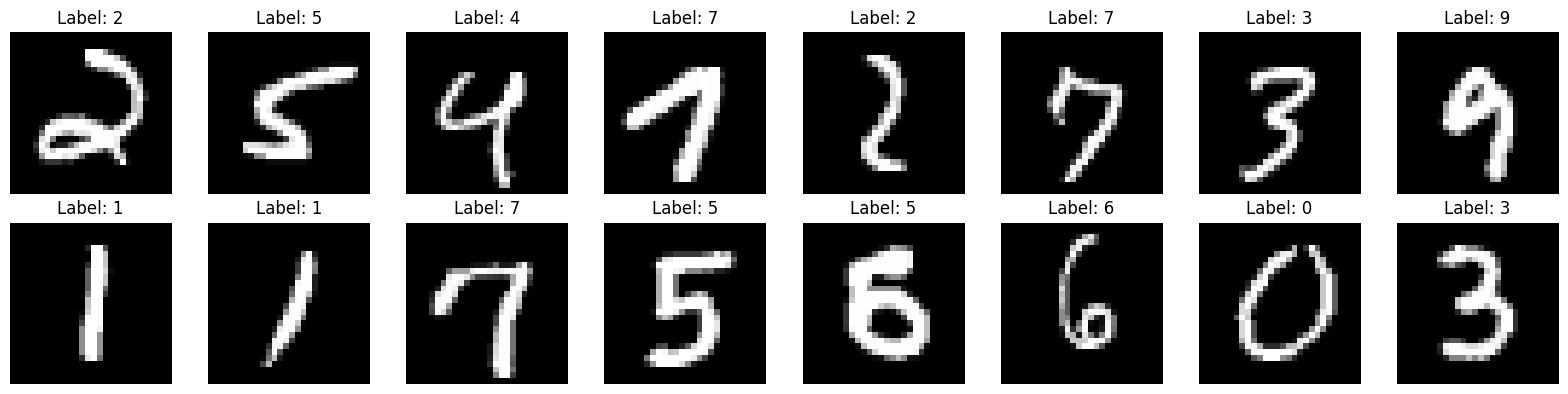

In [13]:
def plot_random_images(X_28x28, num_images, y=None):
    # Randomly select num_images from X_28x28
    random_indices = np.random.choice(len(X_28x28), num_images, replace=False)
    
    # Plot images in a grid with 8 columns
    num_cols = 8
    num_rows = (num_images + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2, num_rows * 2))
    axes = axes.flatten()
    
    for i in range(num_images):
        axes[i].imshow(X_28x28[random_indices[i]], cmap='gray')
        if y is not None:
            axes[i].set_title(f"Label: {y[random_indices[i]]}")
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_random_images(X_28x28, 16, y)

# Train-Test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_28x28, y, test_size=0.30, random_state=42)

In [15]:
print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)
print('y_train shape:',y_train.shape)
print('y_test shape:',y_test.shape)

X_train shape: (29400, 28, 28)
X_test shape: (12600, 28, 28)
y_train shape: (29400,)
y_test shape: (12600,)


Normalize X 

In [16]:
X_train = X_train/255
X_test = X_test/255

# Model - Simple ANN

In [145]:
model1 = Sequential()
model1.add(Flatten(input_shape=(28,28))) 
model1.add(Dense(units=128,activation='relu'))
model1.add(Dense(units=64,activation='relu'))
model1.add(Dense(units=32,activation='relu'))
model1.add(Dense(units=10,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [146]:
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

In [147]:
model1.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [148]:
history1 = model1.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test), batch_size=128)

Epoch 1/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7138 - loss: 0.9398 - val_accuracy: 0.9360 - val_loss: 0.2209
Epoch 2/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9440 - loss: 0.1924 - val_accuracy: 0.9544 - val_loss: 0.1571
Epoch 3/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9614 - loss: 0.1273 - val_accuracy: 0.9587 - val_loss: 0.1349
Epoch 4/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9721 - loss: 0.0903 - val_accuracy: 0.9625 - val_loss: 0.1244
Epoch 5/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9800 - loss: 0.0671 - val_accuracy: 0.9677 - val_loss: 0.1061
Epoch 6/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9836 - loss: 0.0546 - val_accuracy: 0.9637 - val_loss: 0.1218
Epoch 7/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9639 - val_loss: 0.1150
Epoch 8/15
230/230 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9906 - loss: 0.0350 - val_accuracy: 0.

## Model Evaluation

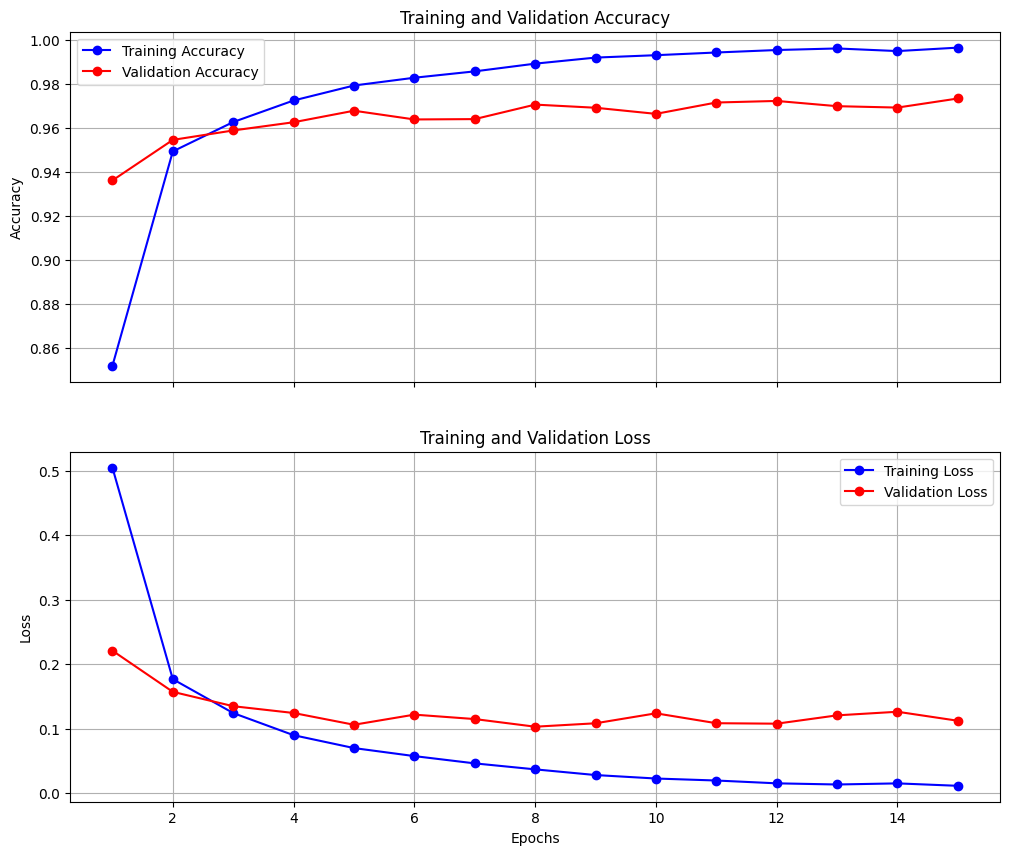

In [149]:
history_dict = history1.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot accuracy vs validation accuracy
axs[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
axs[0].plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='best')
axs[0].grid(True)

# Plot loss vs validation loss
axs[1].plot(epochs, history_dict['loss'], 'bo-', label='Training Loss')
axs[1].plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='best')
axs[1].grid(True)

## KerasTuner RandomSearch for ANN

In [17]:
def build_model(hp):
    
    #units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32)
    activation=hp.Choice("activation", ["relu", "tanh"])
    #optimizer = hp.Choice("optimizer", ["adam",'rmsprop','sgd','adadelta'])
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    
    model = Sequential()
    model.add(Flatten())   
    
    for i in range(hp.Int("num_layers", 1, 5)):
        model.add(Dense(units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                        activation=activation))

    if hp.Boolean("dropout"):
        model.add(Dropout(rate=0.25))
        
    model.add(Dense(10, activation="softmax"))
                         

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model

In [18]:
build_model(kt.HyperParameters())

<Sequential name=sequential, built=False>

In [19]:
tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=5,
    #executions_per_trial=2,
    #overwrite=True,
    directory="my_dir",
    project_name="tuner4",
)

In [20]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 5, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': 'linear'}
dropout (Boolean)
{'default': False, 'conditions': []}


In [21]:
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Trial 5 Complete [00h 00m 23s]
val_accuracy: 0.8940476179122925

Best val_accuracy So Far: 0.9741269946098328
Total elapsed time: 00h 02m 10s


In [22]:
tuner.get_best_hyperparameters()[0].values

{'activation': 'relu',
 'lr': 0.0016583485942236376,
 'num_layers': 1,
 'units_0': 448,
 'dropout': False,
 'units_1': 320,
 'units_2': 224,
 'units_3': 480,
 'units_4': 160}

In [23]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 448)            │       351,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         4,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,170 (1.36 MB)

 Trainable params: 356,170 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history2 = best_model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test), initial_epoch=5, batch_size=32)

Epoch 6/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9899 - loss: 0.0305 - val_accuracy: 0.9742 - val_loss: 0.1031
Epoch 7/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9934 - loss: 0.0198 - val_accuracy: 0.9737 - val_loss: 0.1085
Epoch 8/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9953 - loss: 0.0136 - val_accuracy: 0.9656 - val_loss: 0.1421
Epoch 9/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9931 - loss: 0.0197 - val_accuracy: 0.9718 - val_loss: 0.1289
Epoch 10/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9957 - loss: 0.0119 - val_accuracy: 0.9756 - val_loss: 0.1153
Epoch 11/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9964 - loss: 0.0106 - val_accuracy: 0.9708 - val_loss: 0.1480
Epoch 12/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9963 - loss: 0.0116 - val_accuracy: 0.9733 - val_loss: 0.1324
Epoch 13/15
919/919 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9954 - loss: 0.0121 - val_accuracy

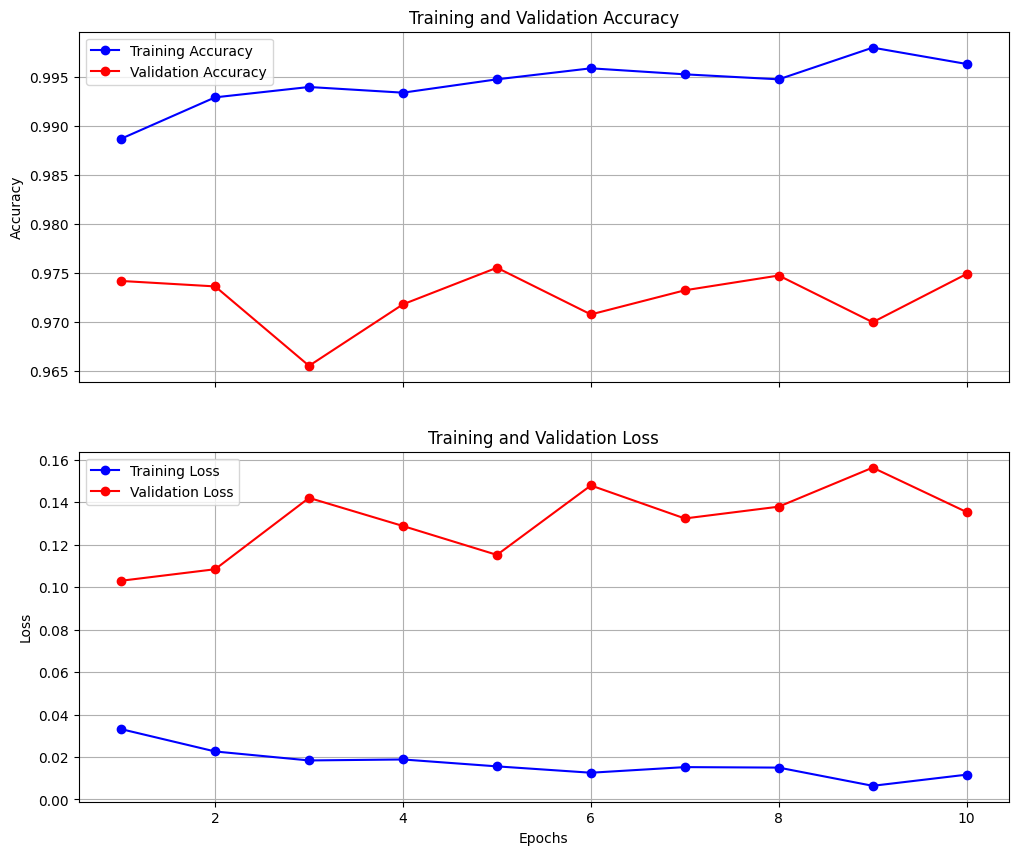

In [25]:
history_dict = history2.history
epochs = range(1, len(history_dict['accuracy']) + 1)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot accuracy vs validation accuracy
axs[0].plot(epochs, history_dict['accuracy'], 'bo-', label='Training Accuracy')
axs[0].plot(epochs, history_dict['val_accuracy'], 'ro-', label='Validation Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].set_ylabel('Accuracy')
axs[0].legend(loc='best')
axs[0].grid(True)

# Plot loss vs validation loss
axs[1].plot(epochs, history_dict['loss'], 'bo-', label='Training Loss')
axs[1].plot(epochs, history_dict['val_loss'], 'ro-', label='Validation Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].legend(loc='best')
axs[1].grid(True)

# Model - CNN

In [178]:
model = Sequential([
        Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)),
        BatchNormalization(),
        MaxPool2D(strides=2),
        Dropout(0.25),

        Conv2D(filters=64, kernel_size=(5,5), padding='valid', activation='relu'),
        BatchNormalization(),
        MaxPool2D(strides=2),
        Dropout(0.25),

        Flatten(),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(84, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
model.summary()

In [179]:
history3 = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size=128)

Epoch 1/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 34s 132ms/step - accuracy: 0.7020 - loss: 0.9965 - val_accuracy: 0.1102 - val_loss: 6.3002
Epoch 2/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 132ms/step - accuracy: 0.9526 - loss: 0.1686 - val_accuracy: 0.7000 - val_loss: 0.8682
Epoch 3/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 40s 130ms/step - accuracy: 0.9670 - loss: 0.1150 - val_accuracy: 0.9810 - val_loss: 0.0605
Epoch 4/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 130ms/step - accuracy: 0.9749 - loss: 0.0887 - val_accuracy: 0.9872 - val_loss: 0.0399
Epoch 5/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9786 - loss: 0.0735 - val_accuracy: 0.9848 - val_loss: 0.0451
Epoch 6/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 41s 131ms/step - accuracy: 0.9803 - loss: 0.0628 - val_accuracy: 0.9863 - val_loss: 0.0447
Epoch 7/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 132ms/step - accuracy: 0.9823 - loss: 0.0615 - val_accuracy: 0.9876 - val_loss: 0.0395
Epoch 8/30
230/230 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - accuracy: 0.9846 - loss: 0

# Prepare Submission File

In [165]:
test_df = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")

In [166]:
test_df.shape

(28000, 784)

In [167]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
test_df.index += 1
test_df['ImageId'] = test_df.index



In [169]:
test_df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,ImageId
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27996
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27997
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27998
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27999


In [170]:
X_test_final = test_df.drop(columns='ImageId').values
X_test_final_norm = X_test_final/255

In [171]:
# Converting test dataset into 28x28
X_test_final_28x28 = X_test_final.reshape(-1, 28, 28).astype(np.uint8)

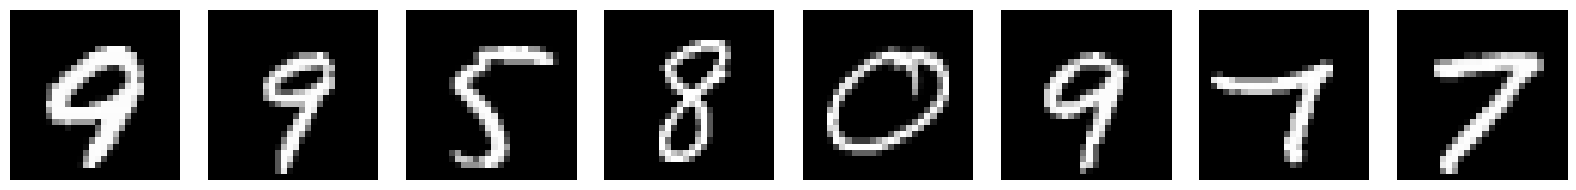

In [172]:
plot_random_images(X_test_final_28x28, 8)

In [173]:
X_test_final_28x28 = X_test_final_28x28/255

In [180]:
# Predict labels using the trained model
predictions = model.predict(X_test_final_28x28)
predicted_labels = np.argmax(predictions, axis=1)  # Get the class with the highest probability

875/875 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step


In [181]:
# Create a DataFrame for the results
results_df = pd.DataFrame({
    'ImageId': test_df['ImageId'],
    'Label': predicted_labels
})

# Save to CSV
results_df.to_csv('submission.csv', index=False)

print('Results saved to submission.csv')

Results saved to submission.csv


# Visualization of Predictions

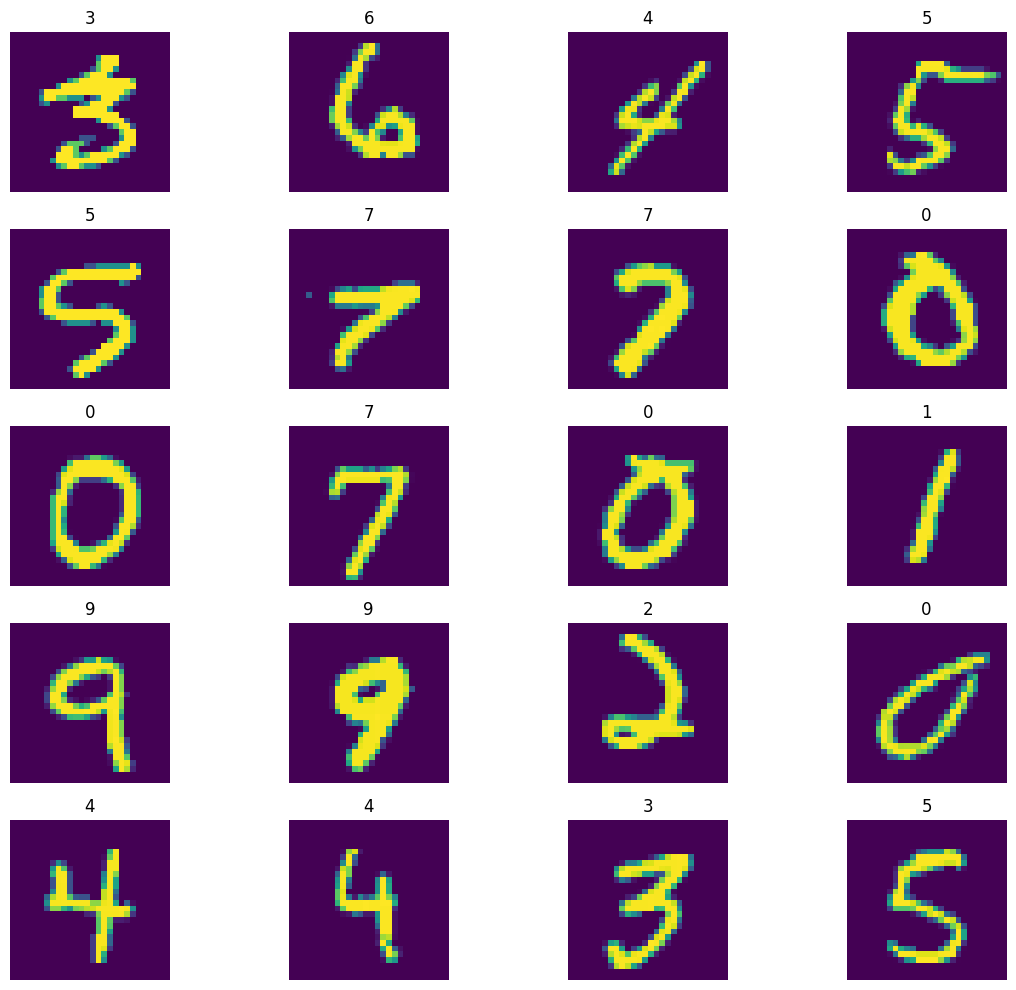

In [184]:
def plot_predicted():
    """
    Randomly Prints Images with their Predicted Labels
    """
    plt.figure(figsize=(12, 10))
    for i in range(20):
        random_idx = np.random.randint(low=0, high=X_test_final_28x28.shape[0])
        
        plt.subplot(5, 4, i + 1)
        plt.imshow(X_test_final_28x28[random_idx], cmap='gray')
        plt.axis('off')        
        plt.title(predicted_labels[random_idx])
    
    plt.tight_layout()
    plt.show()

plot_predicted()

# Notes / Scope of Improvements
- EarlyStopping
- Data Schuffle
- Transfer Learning
- Hyperparameter tuning of CNN
- Plot NN